
... ***CURRENTLY UNDER DEVELOPMENT*** ...


In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# common
import os
import os.path as op
import sys

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import datetime


## Tide gauge data


In [2]:
Site = 'Kwajalein (Marshall Islands)'

# TG
ds_TG = xr.open_dataset('/Users/albacid/Projects/TeslaKit_projects/sites/ROI/TIDE/tide_astro_hist.nc')
ds_TG = ds_TG.rename({'observed':'SSH'})
ds_TG = ds_TG.rename({'predicted':'TIDE'})

# round to hour
ds_TG.coords['time'] = ds_TG['time'].dt.round('h')

# check for duplicate values
_, index = np.unique(ds_TG['time'], return_index=True)
ds_TG = ds_TG.isel(time=index)

# remove mean sea level
ds_TG['TIDE'] = (('time'),  ds_TG['TIDE'].values - np.nanmean(ds_TG['TIDE'].values))

print(ds_TG)


<xarray.Dataset>
Dimensions:  (time: 184104)
Coordinates:
  * time     (time) datetime64[ns] 1996-01-01 ... 2016-12-31T23:00:00
Data variables:
    SSH      (time) float64 ...
    ntr      (time) float64 ...
    sigma    (time) float64 ...
    TIDE     (time) float64 0.303 0.419 0.451 0.392 ... -0.122 -0.414 -0.608


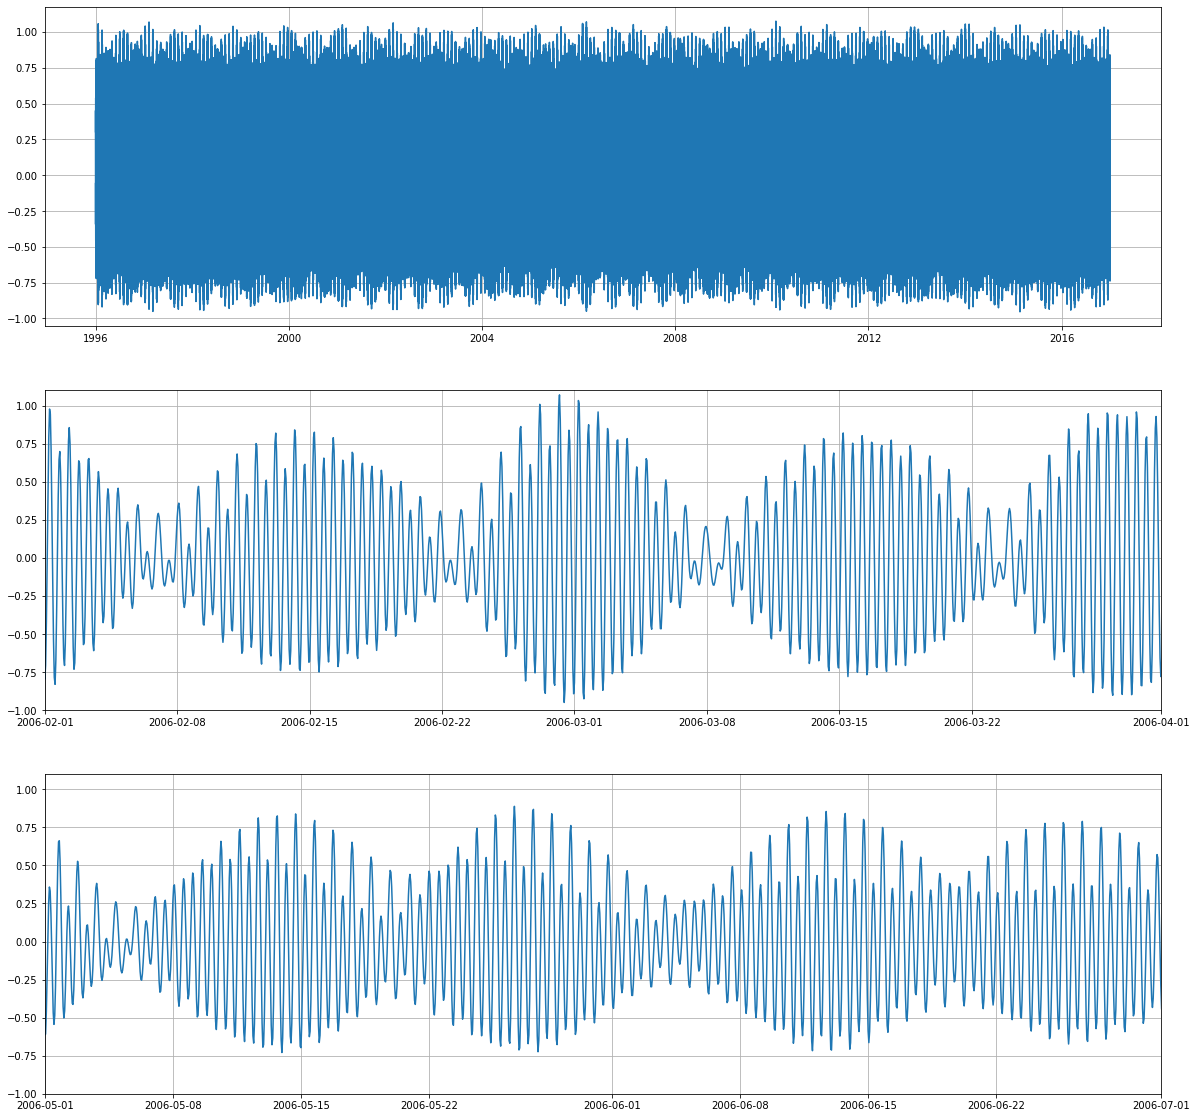

In [3]:
# Plot astronomical tide

# complete time series
fig, axs = plt.subplots(3,1, figsize=(20,20))
axs[0].plot(ds_TG.time, ds_TG.TIDE)
axs[0].grid()

#zoom 1
axs[1].plot(ds_TG.time, ds_TG.TIDE)
axs[1].set_xlim(datetime.datetime(2006,2,1),datetime.datetime(2006,4,1))
axs[1].set_ylim(-1, 1.1)
axs[1].grid()

#zoom 2
axs[2].plot(ds_TG.time, ds_TG.TIDE)
axs[2].set_xlim(datetime.datetime(2006,5,1),datetime.datetime(2006,7,1))
axs[2].set_ylim(-1, 1.1)
axs[2].grid()

# Obtain Mean Lower Low Water (MLLW)
The average of the lower low water height of each tidal day 


In [4]:
AT_min = ds_TG['TIDE'].resample(time='1D').min()
print(np.round(AT_min.mean(), 2).values)
print()

-0.58



# Obtain level of spring low tide


In [8]:
#AT_min = ds_TG['TIDE'].resample(time='1M').min() # min monthly value
AT_min = ds_TG['TIDE'].resample(time='14.6D').min() # min spring tide values

# Mean level over 19 years
AT_19yr = AT_min.sel(time=slice('1996-01-01', '2014-12-31')).mean()
print(np.round(AT_19yr, 2).values)

# Mean level over 19 years
AT_19yr = AT_min.sel(time=slice('1998-01-01', '2016-12-31')).mean()
print(np.round(AT_19yr, 2).values)

-0.81
-0.81
